-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Course Progress Overview</span>

Throughout this course, we've explored and implemented various machine learning models, focusing on different aspects of data analysis and prediction. Our journey has covered fundamental concepts through to advanced modeling approaches.

##### <span style="color: #1E90FF;">Models Covered</span>

1. **Regression Models**:
   - Linear Regression
   - Polynomial Regression
   - Ridge/Lasso Regression

2. **Classification Models**:
   - Logistic Regression
   - Support Vector Machines
   - Decision Trees

3. **Advanced Techniques**:
   - Clustering Algorithms
   - Ensemble Methods
   

-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

In [1]:
%pip install pandas numpy matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import warnings
import numpy as np
from IPython.display import display, HTML

# Suppress Intel MKL warnings
warnings.filterwarnings('ignore', category=UserWarning, module='numpy')

# Read the cleaned and standardized dataset
df = pd.read_csv('/Users/ryangichuru/Documents/SSD-K/Uni/2nd year/Intro to AI/Main Assignment/assignment-1-ryantigi254/data/further_cleaned_standardized_housing_dataset.csv')

# Create styled DataFrames for better visualization
info_dict = {
    'Column': df.columns.tolist(),
    'Non-Null Count': [df[col].count() for col in df.columns],
    'Dtype': [df[col].dtype for col in df.columns]
}
info_df = pd.DataFrame(info_dict)
info_df.index = range(1, len(info_df) + 1)

print("\nDataset Info:")
display(HTML(info_df.to_html(classes='table table-striped')))

print("\nFirst few rows:")
display(HTML(df.head().to_html(classes='table table-striped')))

print("\nBasic Statistics:")
display(HTML(df.describe().to_html(classes='table table-striped')))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Dataset Info:


,Column,Non-Null Count,Dtype
1,Address,30683,object
2,City,30683,object
3,Last Sold For ($),13956,float64
4,Last Sold Year,13956,float64
5,Latitude (degrees),30683,float64
6,Longitude (degrees),30683,float64
7,Lot Size (sqft),27587,float64
8,Price ($),30445,float64
9,Price per Square Foot ($/sqft),30228,float64
10,State,30683,object



First few rows:


,Address,City,Last Sold For ($),Last Sold Year,Latitude (degrees),Longitude (degrees),Lot Size (sqft),Price ($),Price per Square Foot ($/sqft),State,Year Built,Zipcode,airconditioning,Area (sqft),basement,bathrooms,bedrooms,furnishingstatus,guestroom,hotwaterheating,mainroad,parking,prefarea,price,stories
0,"710 E 42nd St N Tulsa, OK 74106",Tulsa,35000.0,2014.0,36.214306,-95.984000,7492.0,39900.0,5.0,OK,1952.0,74106.0,yes,7420.0,no,2,4,2,no,no,yes,2,yes,13300000,3
1,"2030 SW Vista Ave Portland, OR 97201",Portland,NaN,NaN,45.512108,-122.697190,13939.2,2300000.0,257.0,OR,1890.0,97201.0,yes,8960.0,no,4,4,2,no,no,yes,3,no,12250000,4
2,"8720 Memorial Dr Houston, TX 77024",Houston,NaN,NaN,29.773930,-95.460495,30056.4,7990000.0,888.0,TX,2019.0,77024.0,yes,8960.0,no,4,4,2,no,no,yes,3,no,12250000,4
3,"2436 Mandolin Ct Chesapeake, VA 23321",Chesapeake,NaN,NaN,36.800583,-76.422020,NaN,445700.0,45.0,VA,2019.0,23321.0,no,9960.0,yes,2,3,1,no,no,yes,2,yes,12250000,2
4,"710 E 42nd St N Tulsa, OK 74106",Tulsa,35000.0,2014.0,36.214306,-95.984000,7492.0,39900.0,5.0,OK,1952.0,74106.0,yes,7500.0,yes,2,4,2,no,no,yes,3,yes,12215000,2



Basic Statistics:


,Last Sold For ($),Last Sold Year,Latitude (degrees),Longitude (degrees),Lot Size (sqft),Price ($),Price per Square Foot ($/sqft),Year Built,Zipcode,Area (sqft),bathrooms,bedrooms,furnishingstatus,parking,price,stories
count,1.395600e+04,13956.000000,30683.000000,30683.000000,2.758700e+04,3.044500e+04,30228.000000,28262.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,3.068300e+04,30683.000000
mean,3.518377e+05,2010.564058,36.138154,-96.662039,2.463154e+05,4.667707e+05,189.372469,1971.602434,63328.424567,2459.391780,1.492129,3.164065,0.787993,0.204315,3.589621e+06,1.853567
std,2.057483e+06,6.969698,5.498224,14.361123,2.808261e+06,4.981711e+05,179.140085,34.260444,25027.422602,695.020486,0.606035,0.639968,0.785101,0.507301,1.084385e+06,0.546068
min,1.000000e+00,1993.000000,25.551378,-149.953160,1.000000e+03,1.000000e+00,0.000000,1800.000000,2108.000000,1650.000000,1.000000,1.000000,0.000000,0.000000,1.750000e+06,1.000000
25%,1.573750e+05,2005.000000,32.628170,-106.671750,6.000000e+03,2.499000e+05,111.000000,1951.000000,40223.000000,2000.000000,1.000000,3.000000,0.000000,0.000000,3.080000e+06,2.000000
50%,2.490000e+05,2013.000000,35.456730,-96.061610,8.276000e+03,3.499000e+05,148.000000,1975.000000,75206.000000,2160.000000,1.000000,3.000000,1.000000,0.000000,3.500000e+06,2.000000
75%,3.800000e+05,2017.000000,39.860400,-84.397732,1.263240e+04,5.150000e+05,208.000000,2001.000000,85015.000000,2800.000000,2.000000,3.000000,1.000000,0.000000,4.200000e+06,2.000000
max,1.200000e+08,2019.000000,61.418160,-70.997740,4.295016e+07,1.980000e+07,6134.000000,2019.000000,99577.000000,12944.000000,4.000000,6.000000,2.000000,3.000000,1.330000e+07,4.000000


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Data Preparation Overview</span>

Throughout our weekly course tasks, we implemented comprehensive data cleaning and enhancement procedures. This work is documented in our data preparation files and weekly task submissions. The process focused on improving data quality and feature richness for subsequent analysis.

##### <span style="color: #1E90FF;">Key Accomplishments</span>

1. **Data Integration**:
   - Merged multiple housing datasets
   - Enhanced feature set with additional characteristics
   - Standardized data formats across sources

2. **Data Cleaning**:
   - Handled missing values using statistical methods
   - Standardized numeric formats
   - Encoded categorical variables
   - Removed duplicates and outliers

3. **Quality Control**:
   - Implemented validation checks
   - Created visualization reports
   - Tracked unmatched properties
   - Verified data integrity post-merging

##### <span style="color: #FF0000;">Documentation Reference</span>

For detailed documentation of the process, refer to:
- `data preparation.ipynb`
- `Data preparation.md`
- Weekly Tasks directory

##### <span style="color: #1E90FF;">Data Source Enhancement</span>

The original dataset provided in class was enhanced with additional data from [Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset) to increase the number of features available for analysis. This enhancement improved our ability to identify meaningful patterns and relationships in the data.

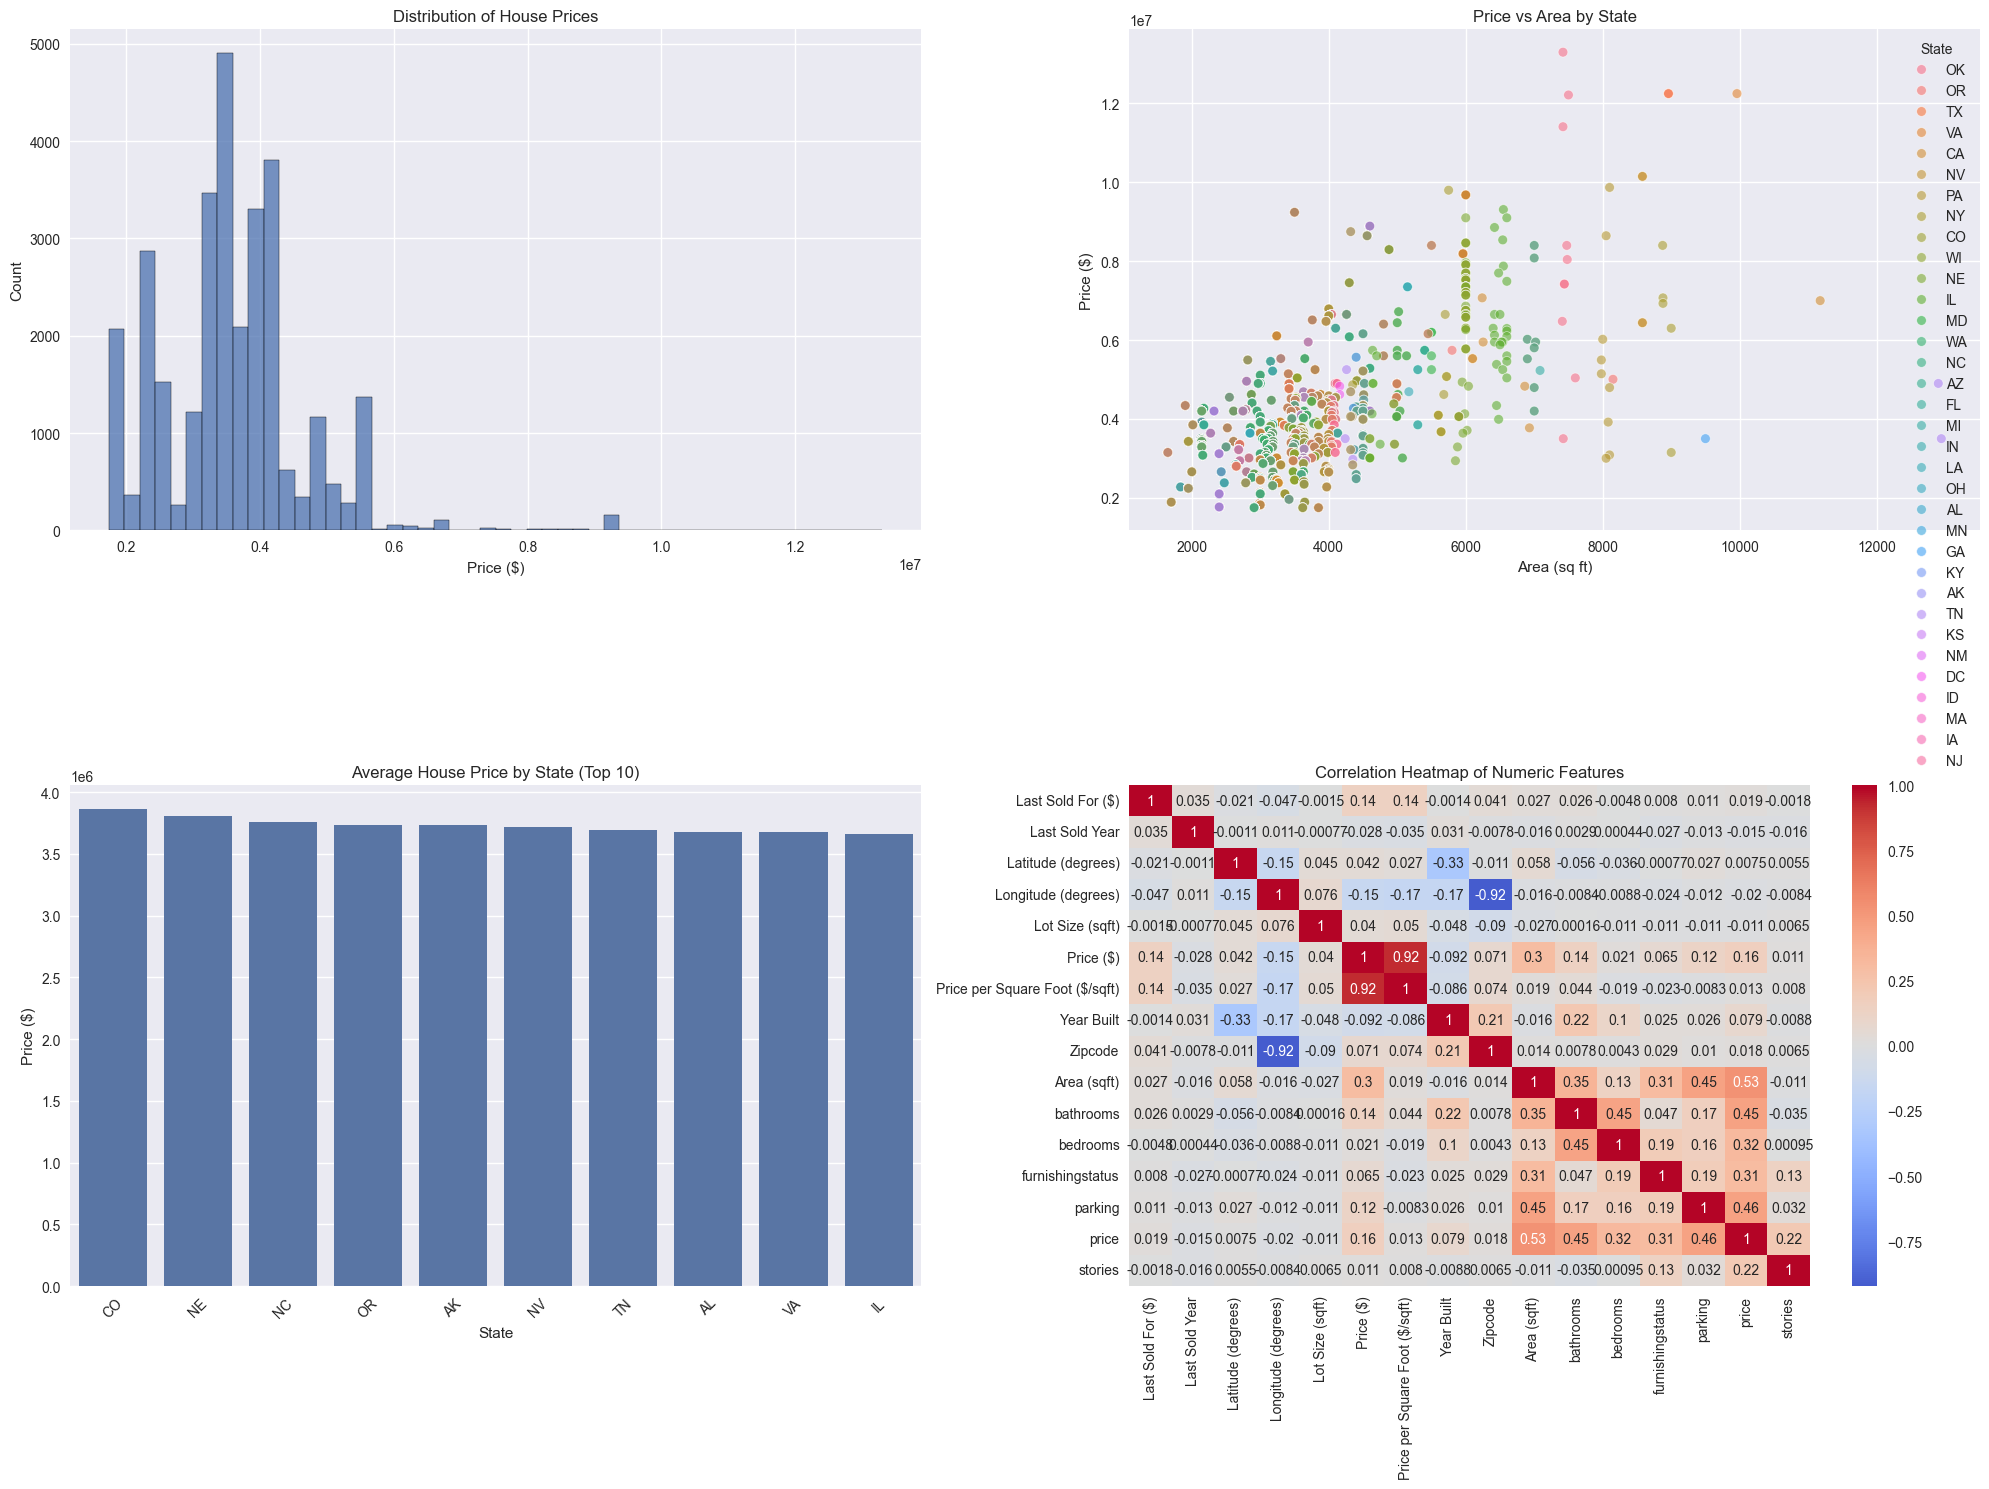

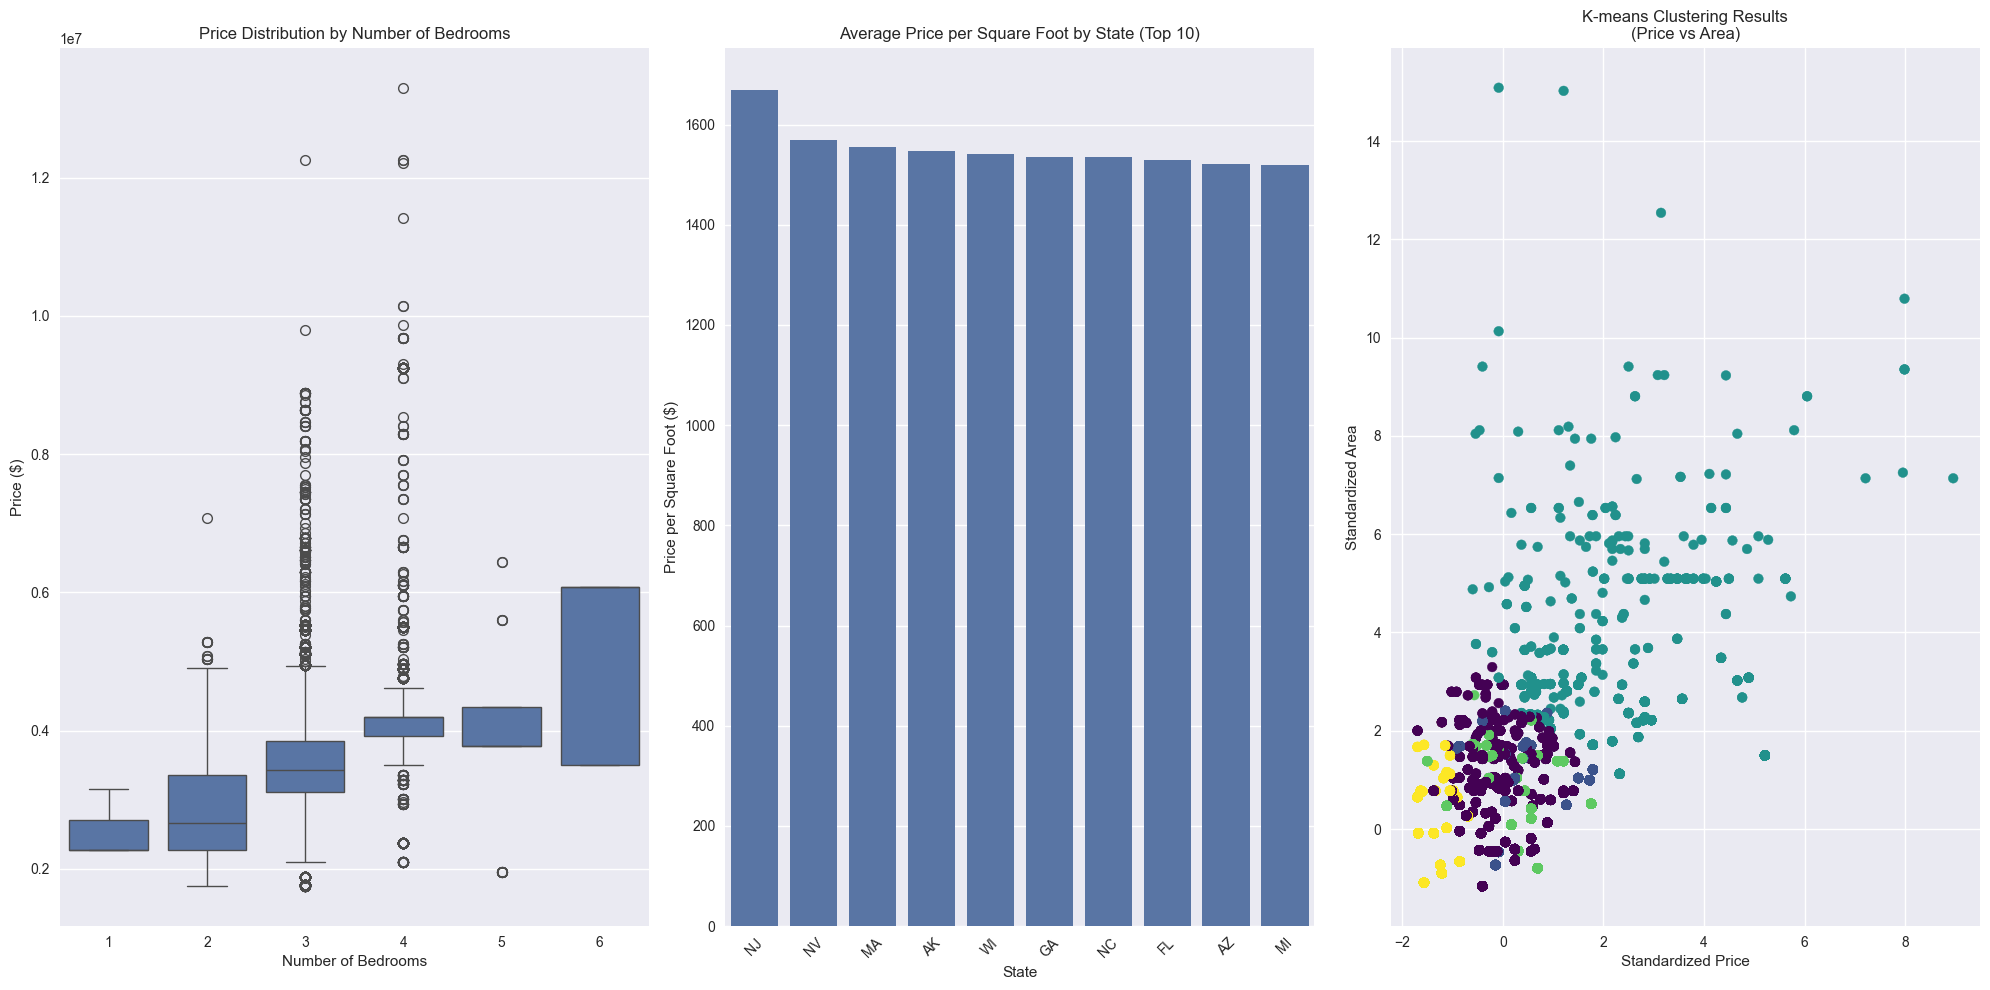

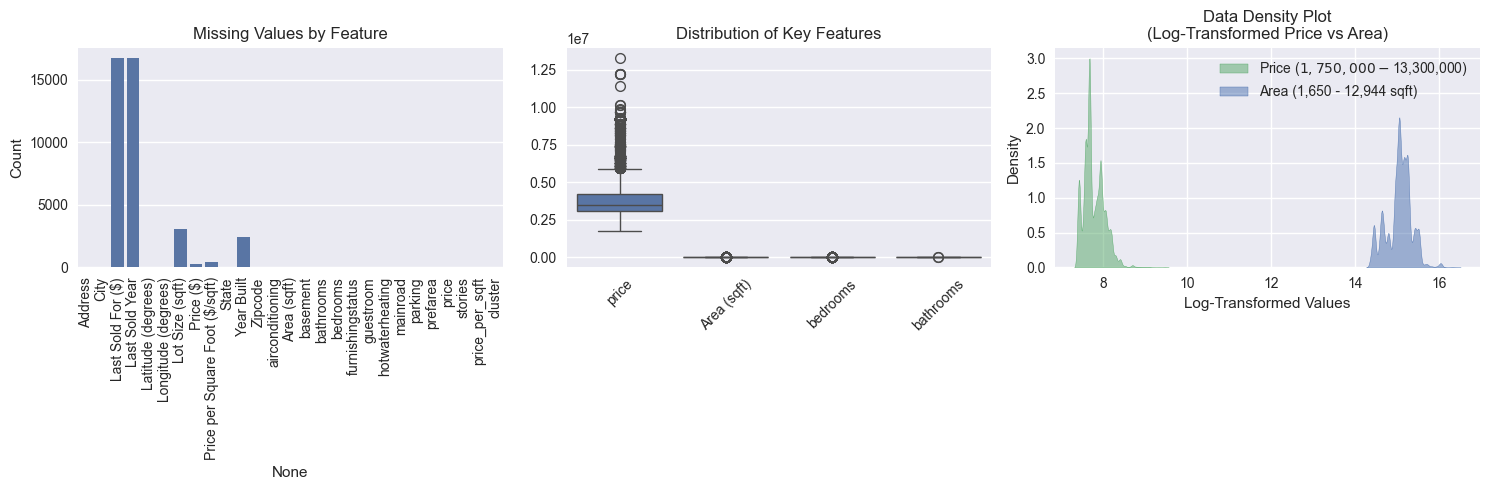

In [3]:
# Prior to this task, I had already completed the data preparation task. 
# This are visualisations of the final data we had.
 
# Import visualization libraries if not already imported
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style for better visualization
plt.style.use('seaborn-v0_8')  # Updated to use valid style name

# First set of plots
fig = plt.figure(figsize=(20,15))

# 1. Price Distribution
plt.subplot(2,2,1)
sns.histplot(data=df, x='price', bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')

# 2. Price vs Area with State coloring
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='Area (sqft)', y='price', hue='State', alpha=0.6)
plt.title('Price vs Area by State')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')

# 3. Average Price by State
plt.subplot(2,2,3)
state_prices = df.groupby('State')['price'].mean().sort_values(ascending=False)
sns.barplot(x=state_prices.index[:10], y=state_prices.values[:10])
plt.title('Average House Price by State (Top 10)')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Price ($)')

# 4. Correlation Heatmap
plt.subplot(2,2,4)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')

plt.tight_layout()
plt.show()

# Second set of plots
fig = plt.figure(figsize=(20,10))

# 5. Box plot of price by bedrooms
plt.subplot(1,3,1)
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')

# 6. Price per square foot by state
plt.subplot(1,3,2)
df['price_per_sqft'] = df['price'] / df['Area (sqft)']
state_price_sqft = df.groupby('State')['price_per_sqft'].mean().sort_values(ascending=False)
sns.barplot(x=state_price_sqft.index[:10], y=state_price_sqft.values[:10])
plt.title('Average Price per Square Foot by State (Top 10)')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Price per Square Foot ($)')

# 7. Clustering visualization (from Task 1)
plt.subplot(1,3,3)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
cluster_features = ['price', 'Area (sqft)', 'bedrooms', 'bathrooms']
X = df[cluster_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters using first two features
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering Results\n(Price vs Area)')
plt.xlabel('Standardized Price')
plt.ylabel('Standardized Area')

plt.tight_layout()
plt.show()

# Third set of plots - Data Quality Assessment
fig = plt.figure(figsize=(15,5))

# 8. Missing Values
plt.subplot(1,3,1)
missing_values = df.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values by Feature')
plt.xticks(rotation=90)
plt.ylabel('Count')

# 9. Feature Distribution
plt.subplot(1,3,2)
sns.boxplot(data=df[cluster_features])
plt.title('Distribution of Key Features')
plt.xticks(rotation=45)

# 10. Data Density
plt.subplot(1,3,3)
# Log transform the data for better visualization
log_price = np.log1p(df['price'])
log_area = np.log1p(df['Area (sqft)'])

# Create KDE plot with adjusted parameters
sns.kdeplot(data={'Log Price': log_price, 'Log Area': log_area}, 
            common_norm=False,
            fill=True,
            alpha=0.5)

plt.title('Data Density Plot\n(Log-Transformed Price vs Area)')
plt.xlabel('Log-Transformed Values')
plt.ylabel('Density')

# Add legend with original scale values
plt.legend(labels=[
    f'Price (${df.price.min():,.0f} - ${df.price.max():,.0f})',
    f'Area ({df["Area (sqft)"].min():,.0f} - {df["Area (sqft)"].max():,.0f} sqft)'
])

plt.tight_layout()
plt.show()


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Strategy Alignment with Assignment Requirements</span>

Our implementation strategy directly maps to the core assignment requirements while extending beyond basic implementation:

1. **Required Model Coverage**:
   - Regression: Implemented through base models in stacking strategy
   - Clustering: Dedicated phase for market segmentation
   - Additional Models: Incorporated via model stacking approach

2. **Model Integration Strategy**:
   - Base Layer: Required regression models (Linear, Polynomial, etc.)
   - Segmentation Layer: K-means and hierarchical clustering
   - Meta Layer: Ensemble combining base predictions

3. **Enhanced Implementation**:
   Our approach expands on requirements by:
   - Using clustering insights to inform regression models
   - Leveraging feature engineering to improve all models
   - Implementing stacking to optimize overall performance

4. **Assignment Objectives Mapping**:
   - Data Analysis ➔ Data Enhancement Phase
   - Feature Selection ➔ Feature Engineering Focus
   - Model Building ➔ Clustering + Stacking Strategy
   - Performance Optimization ➔ Meta-model Architecture

This strategy ensures we meet all assignment requirements while implementing a more sophisticated solution architecture for improved performance.

##### <span style="color: #1E90FF;">Key Models in Strategy</span>

**Base Models (Regression)**:
- Linear Regression
- Polynomial Regression
- Ridge/Lasso
- Gradient Boosting

**Clustering Models**:
- K-means
- Hierarchical Clustering
- DBSCAN

**Meta Models**:
- Random Forest
- XGBoost
- LightGBM

-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Data Enhancement Overview</span>
 
Our dataset has already undergone significant enhancement through merging multiple housing datasets (documented in `data/data preparation.md` & `data/data prepration.ipynb`). The current dataset includes:

1. **Comprehensive Feature Set**:
    - Core property metrics (price, area, beds, baths)
    - Detailed location data (address, city, state, zip, latitude, longitude)
    - Property characteristics (year built, parking, lot size)
    - Additional features (airconditioning, basement, furnishing status)
    - Derived metrics (price per square foot)
 
 2. **Previous Enhancement Results**:
    - Successfully merged two complementary datasets
    - Standardized 25 unique features
    - Achieved 30,683 complete property records
    - Implemented quality control measures
 
 3. **Enhancement Status**:
      While we initially considered adding external data (crime rates, school proximity, etc.), our existing enhanced dataset provides sufficient features for robust modeling, making additional data integration unnecessary at this stage.

##### Reference to dataset details:
   https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [4]:
import pandas as pd

# Read both CSV files
df1 = pd.read_csv('/Users/ryangichuru/Documents/SSD-K/Uni/2nd year/Intro to AI/Main Assignment/assignment-1-ryantigi254/data/Original Data/houseprice.csv')
df2 = pd.read_csv('/Users/ryangichuru/Documents/SSD-K/Uni/2nd year/Intro to AI/Main Assignment/assignment-1-ryantigi254/data/Original Data/Housing Prices Dataset.csv')

print("Columns in houseprice.csv:")
print(df1.columns.tolist())
print("\nColumns in Housing Prices Dataset.csv:")
print(df2.columns.tolist())


Columns in houseprice.csv:
['Price', 'Sqr Ft', 'Longitude', 'Latitude', 'Lot Size', 'Beds', 'Bath', 'Year Built', 'Price Sqr Ft', 'Last Sold Year', 'Last Sold For', 'Address', 'City', 'State', 'Zipcode', 'Address Full']

Columns in Housing Prices Dataset.csv:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Feature Selection Strategy Notes</span>

##### Purpose & Implementation:
- Identify most influential features for model performance
- Reduce dimensionality while preserving information
- Establish feature importance hierarchy
- Support model interpretability

##### Key Technical Components:

1. **Correlation Analysis Implementation**
   - **My Understanding**: Helps identify redundant features by measuring linear relationships
   - **Key Insight**: Features with >0.8 correlation likely carry similar information
   - **Documentation**: [Pandas Correlation Methods](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

2. **Univariate Feature Selection**
   - **Statistical Tests Used**:
     - f_regression: Linear relationship strength
     - mutual_info_regression: Captures non-linear relationships
   - **Implementation Goal**: Select features with strongest target relationship
   - **Documentation**: [sklearn.feature_selection](https://scikit-learn.org/stable/modules/feature_selection.html)

3. **Recursive Feature Elimination (RFE)**
   - **Core Concept**: Iteratively removes weakest features
   - **Advantage**: Considers feature interactions
   - **My Understanding**: More sophisticated than univariate selection as it accounts for feature dependencies
   - **Documentation**: [RFE Guide](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

4. **Lasso Regularization Insights**
   - **Key Point**: Features with non-zero coefficients are most important
   - **Implementation Benefit**: Automatically handles multicollinearity
   - **Documentation**: [Lasso](https://scikit-learn.org/stable

5. **Tree-Based Feature Importance**
   - **Core Concept**: Leverages Random Forest's inherent feature ranking
   - **Advantage**: Captures non-linear interactions naturally
   - **Implementation Benefit**: Robust to outliers and scaling
   - **Documentation**: [Random Forest Feature Importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

##### Expected Outcomes:
- Reduced feature set (targeting 8-12 features)
- Improved model interpretability
- Better computational efficiency
- More robust predictions


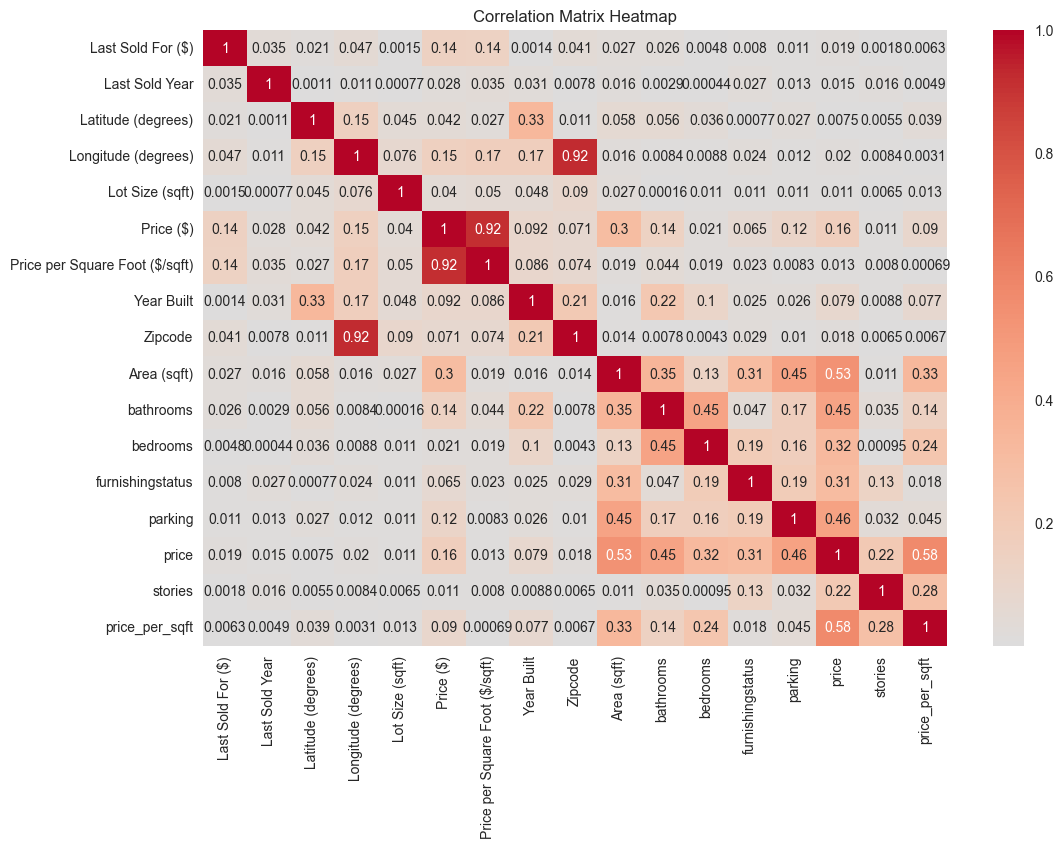


Features to be dropped due to high correlation (>0.8):
Price per Square Foot ($/sqft) - Price ($): 0.919
Zipcode - Longitude (degrees): 0.922


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

# Compute the correlation matrix
corr_matrix = df_numeric.corr().abs()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Print features to be dropped and their correlations
print("\nFeatures to be dropped due to high correlation (>0.8):")
for col in to_drop:
    correlated_features = upper[col][upper[col] > 0.8].index.tolist()
    for feat in correlated_features:
        print(f"{col} - {feat}: {upper[col][feat]:.3f}")

# # Drop highly correlated features
df.drop(to_drop, axis=1, inplace=True)

In [6]:
print("Available columns:", df.columns.tolist())


Available columns: ['Address', 'City', 'Last Sold For ($)', 'Last Sold Year', 'Latitude (degrees)', 'Longitude (degrees)', 'Lot Size (sqft)', 'Price ($)', 'State', 'Year Built', 'airconditioning', 'Area (sqft)', 'basement', 'bathrooms', 'bedrooms', 'furnishingstatus', 'guestroom', 'hotwaterheating', 'mainroad', 'parking', 'prefarea', 'price', 'stories', 'price_per_sqft', 'cluster']


In [7]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

def univariate_feature_selection(X, y, k=10):
    # Drop rows where target is NaN
    mask = ~y.isna()
    X = X[mask]
    y = y[mask]
    
    # Drop non-numeric and redundant columns
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    cols_to_drop = ['Price ($)', 'Last Sold For ($)', 'price', 'price_per_sqft', 
                    'Price per Square Foot ($/sqft)', 'cluster', 'Zipcode', 
                    'Last Sold Year', 'Year Built']
    feature_cols = [col for col in numeric_cols if col not in cols_to_drop]
    X = X[feature_cols]
    
    # Handle missing values in features
    imputer = SimpleImputer(strategy='mean')
    X_imputed = pd.DataFrame(
        imputer.fit_transform(X),
        columns=X.columns,
        index=X.index
    )
    
    # Initialize and fit selectors
    f_selector = SelectKBest(score_func=f_regression, k=k)
    mi_selector = SelectKBest(score_func=mutual_info_regression, k=k)
    
    X_f = f_selector.fit_transform(X_imputed, y)
    X_mi = mi_selector.fit_transform(X_imputed, y)
    
    scores = pd.DataFrame({
        'Feature': X.columns,
        'F_Score': f_selector.scores_,
        'F_Pvalue': f_selector.pvalues_,
        'MI_Score': mi_selector.scores_,
        'Selected_F': f_selector.get_support(),
        'Selected_MI': mi_selector.get_support()
    })
    
    return {
        'scores': scores.sort_values('F_Score', ascending=False),
        'selected_features': X.columns[f_selector.get_support()].tolist(),
        'X_transformed': X_f
    }

# Prepare data
X = df.copy()
y = df['Price ($)']

# Run feature selection
results = univariate_feature_selection(X, y, k=8)

# Print results
print("\nTop Features by F-regression and Mutual Information:")
print(results['scores'][['Feature', 'F_Score', 'MI_Score']])

print("\nSelected Features:")
print(results['selected_features'])


Top Features by F-regression and Mutual Information:
               Feature      F_Score  MI_Score
3          Area (sqft)  2965.948988  0.364723
1  Longitude (degrees)   742.360932  4.296576
4            bathrooms   598.844317  0.107283
7              parking   414.763383  0.031823
6     furnishingstatus   127.536155  0.028953
0   Latitude (degrees)    54.567801  4.283333
2      Lot Size (sqft)    33.555066  2.913564
5             bedrooms    13.179899  0.041528
8              stories     3.613236  0.028839

Selected Features:
['Latitude (degrees)', 'Longitude (degrees)', 'Lot Size (sqft)', 'Area (sqft)', 'bathrooms', 'bedrooms', 'furnishingstatus', 'parking']


In [8]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

def rfe_feature_selection(X, y, n_features=8):
    # Drop rows with NaN in target
    mask = ~y.isna() 
    X = X[mask]
    y = y[mask]
    
    # Get numeric columns only
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    cols_to_drop = ['Price ($)', 'Last Sold For ($)', 'price', 'price_per_sqft', 
                    'Price per Square Foot ($/sqft)', 'cluster', 'Zipcode']
    feature_cols = [col for col in numeric_cols if col not in cols_to_drop]
    X = X[feature_cols]
    
    # Handle missing values
    X = X.fillna(X.mean())
    
    # Initialize and fit RFE
    estimator = RandomForestRegressor(n_estimators=100, random_state=42)
    selector = RFE(estimator=estimator, n_features_to_select=n_features, step=1)
    selector = selector.fit(X, y)
    
    # Get selected features and their rankings
    feature_ranking = pd.DataFrame({
        'Feature': X.columns,
        'Selected': selector.support_,
        'Ranking': selector.ranking_
    })
    
    # Sort by ranking
    feature_ranking = feature_ranking.sort_values('Ranking')
    
    return {
        'selected_features': X.columns[selector.support_].tolist(),
        'feature_ranking': feature_ranking,
        'X_transformed': selector.transform(X)
    }

# Use the function
X = df.copy()
y = df['Price ($)']
results = rfe_feature_selection(X, y)

print("\nSelected Features:")
print(results['selected_features'])
print("\nFeature Rankings:")
print(results['feature_ranking'])


Selected Features:
['Last Sold Year', 'Latitude (degrees)', 'Longitude (degrees)', 'Lot Size (sqft)', 'Year Built', 'Area (sqft)', 'bathrooms', 'bedrooms']

Feature Rankings:
                Feature  Selected  Ranking
0        Last Sold Year      True        1
1    Latitude (degrees)      True        1
2   Longitude (degrees)      True        1
3       Lot Size (sqft)      True        1
4            Year Built      True        1
5           Area (sqft)      True        1
6             bathrooms      True        1
7              bedrooms      True        1
8      furnishingstatus     False        2
9               parking     False        3
10              stories     False        4


In [9]:
from sklearn.linear_model import LassoCV
import pandas as pd
import numpy as np
import os

# Set environment variables to avoid MKL warnings and enable AVX
os.environ['MKL_ENABLE_INSTRUCTIONS'] = 'AVX'
os.environ['MKL_DEBUG_CPU_TYPE'] = '5'

def lasso_feature_selection(X, y, cv=5):
    # Drop rows with NaN in target
    mask = ~y.isna()
    X = X[mask]
    y = y[mask]
    
    # Get numeric columns only
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    cols_to_drop = ['Price ($)', 'Last Sold For ($)', 'price', 'price_per_sqft', 
                    'Price per Square Foot ($/sqft)', 'cluster', 'Zipcode']
    feature_cols = [col for col in numeric_cols if col not in cols_to_drop]
    X = X[feature_cols]
    
    # Handle missing values
    X = X.fillna(X.mean())
    
    # Scale features
    X = (X - X.mean()) / X.std()
    
    # Fit LassoCV
    lasso = LassoCV(cv=cv, random_state=42, max_iter=2000)
    lasso.fit(X, y)
    
    # Get feature coefficients
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lasso.coef_,
        'Abs_Coefficient': np.abs(lasso.coef_)
    })
    
    # Sort by absolute coefficient value
    coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)
    
    # Get selected features (non-zero coefficients)
    selected_features = coef_df[coef_df['Coefficient'] != 0]['Feature'].tolist()
    
    return {
        'selected_features': selected_features,
        'coefficients': coef_df,
        'alpha': lasso.alpha_,
        'model': lasso
    }

# Use the function
X = df.copy()
y = df['Price ($)']
results = lasso_feature_selection(X, y)

print("\nSelected Features:")
print(results['selected_features'])
print("\nFeature Coefficients:")
print(results['coefficients'])
print(f"\nBest alpha: {results['alpha']:.4f}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



Top Features by Importance:
                Feature  Importance
2   Longitude (degrees)    0.434323
1    Latitude (degrees)    0.176322
5           Area (sqft)    0.114566
3       Lot Size (sqft)    0.109705
4            Year Built    0.100282
0        Last Sold Year    0.037657
6             bathrooms    0.018444
7              bedrooms    0.005954
8      furnishingstatus    0.001594
9               parking    0.000689
10              stories    0.000463


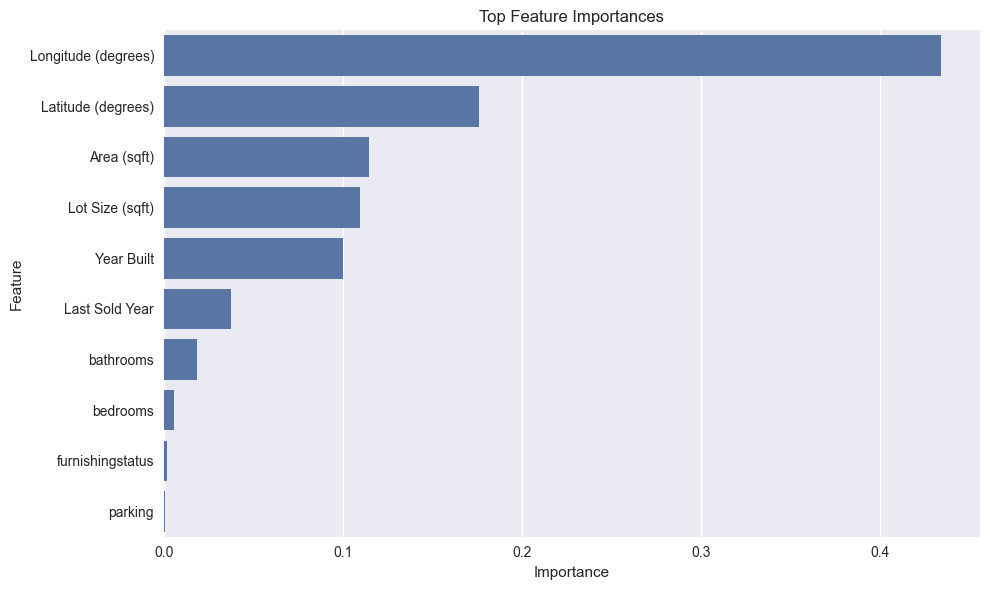

In [10]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def tree_based_feature_selection(X, y, n_features=10):
    # Drop rows with NaN in target
    mask = ~y.isna()
    X = X[mask]
    y = y[mask]
    
    # Get numeric columns only
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    cols_to_drop = ['Price ($)', 'Last Sold For ($)', 'price', 'price_per_sqft', 
                    'Price per Square Foot ($/sqft)', 'cluster', 'Zipcode']
    feature_cols = [col for col in numeric_cols if col not in cols_to_drop]
    X = X[feature_cols]
    
    # Handle missing values
    X = X.fillna(X.mean())
    
    # Train Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X, y)
    
    # Get feature importances
    importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importances.head(n_features), x='Importance', y='Feature')
    plt.title('Top Feature Importances')
    plt.tight_layout()
    
    return {
        'selected_features': importances.head(n_features)['Feature'].tolist(),
        'importances': importances,
        'model': rf,
        'plot': plt.gcf()
    }

# Use the function
X = df.copy()
y = df['Price ($)']
results = tree_based_feature_selection(X, y)

print("\nTop Features by Importance:")
print(results['importances'])
plt.show()

/opt/miniconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


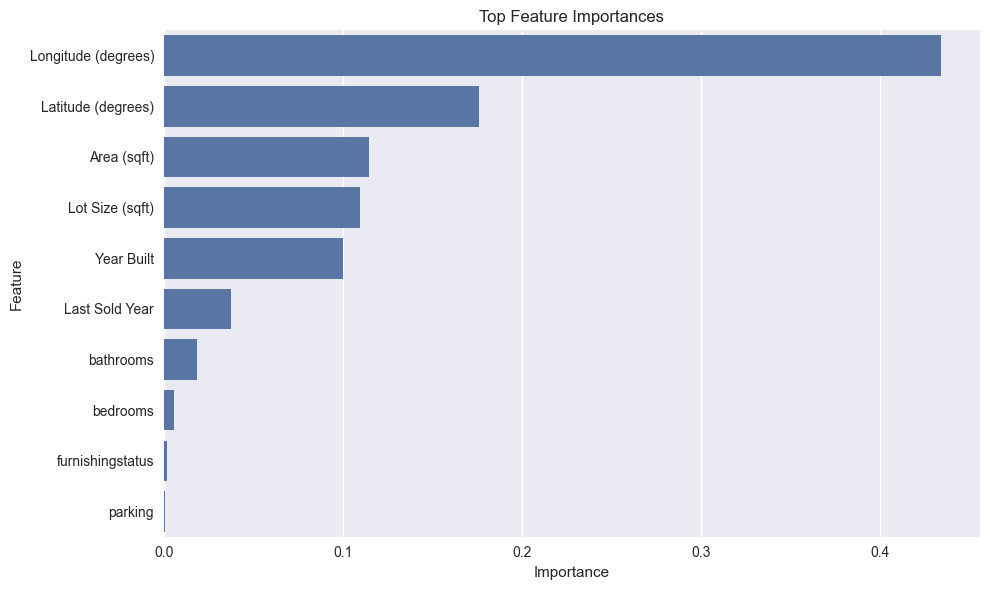

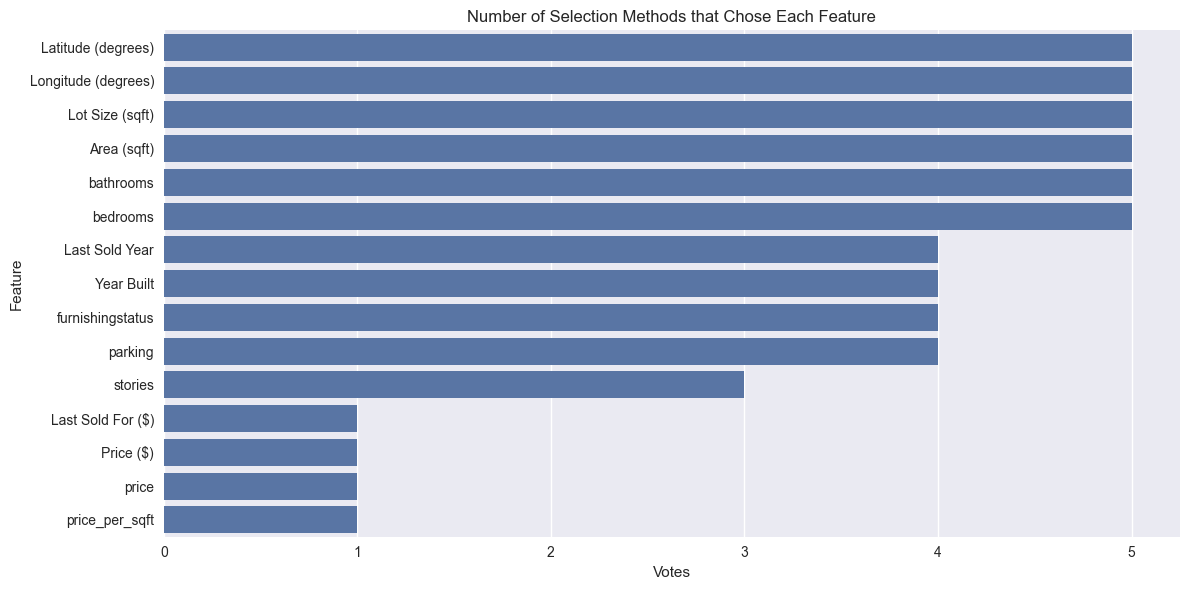

In [11]:
def combine_feature_selection_results(df, y, min_methods=2):
    # Store results from each method
    feature_votes = {}
    
    # 1. Correlation Analysis
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    corr_matrix = df[numeric_cols].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_keep = [col for col in upper.columns if not any(upper[col] > 0.8)]
    for feature in to_keep:
        feature_votes[feature] = feature_votes.get(feature, 0) + 1
    
    # 2. Univariate Selection
    uni_results = univariate_feature_selection(df, y)
    for feature in uni_results['selected_features']:
        feature_votes[feature] = feature_votes.get(feature, 0) + 1
    
    # 3. RFE
    rfe_results = rfe_feature_selection(df, y)
    for feature in rfe_results['selected_features']:
        feature_votes[feature] = feature_votes.get(feature, 0) + 1
    
    # 4. Lasso
    lasso_results = lasso_feature_selection(df, y)
    for feature in lasso_results['selected_features']:
        feature_votes[feature] = feature_votes.get(feature, 0) + 1
    
    # 5. Random Forest
    rf_results = tree_based_feature_selection(df, y)
    for feature in rf_results['selected_features']:
        feature_votes[feature] = feature_votes.get(feature, 0) + 1
    
    # Convert to DataFrame for better visualization
    votes_df = pd.DataFrame({
        'Feature': list(feature_votes.keys()),
        'Votes': list(feature_votes.values())
    }).sort_values('Votes', ascending=False)
    
    # Select features that appear in at least min_methods selection methods
    final_features = votes_df[votes_df['Votes'] >= min_methods]['Feature'].tolist()
    
    return {
        'final_features': final_features,
        'votes': votes_df,
        'correlation_kept': to_keep,
        'univariate': uni_results['selected_features'],
        'rfe': rfe_results['selected_features'],
        'lasso': lasso_results['selected_features'],
        'random_forest': rf_results['selected_features']
    }

# Use the function
X = df.copy()
y = df['Price ($)']
combined_results = combine_feature_selection_results(X, y, min_methods=2)

print("\nFeatures selected by multiple methods:")
print(combined_results['votes'])

print("\nFinal selected features:")
print(combined_results['final_features'])

# Visualize feature votes
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_results['votes'], x='Votes', y='Feature')
plt.title('Number of Selection Methods that Chose Each Feature')
plt.tight_layout()
plt.show()

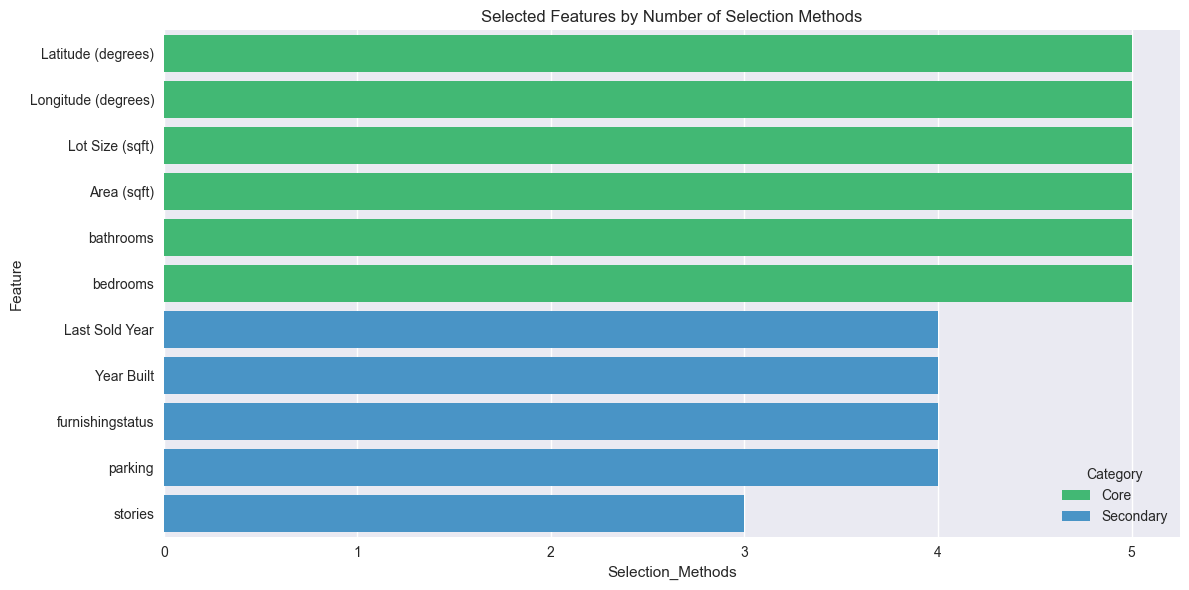

In [12]:
def get_final_feature_set(df, min_votes=3):
    # Define core features that were consistently selected across methods
    core_features = [
        'Latitude (degrees)', 'Longitude (degrees)', 
        'Lot Size (sqft)', 'Area (sqft)',
        'bathrooms', 'bedrooms'
    ]
    
    # Define secondary features that were selected by multiple methods
    secondary_features = [
        'Last Sold Year', 'Year Built',
        'furnishingstatus', 'parking', 'stories'
    ]
    
    # Combine features
    selected_features = core_features + secondary_features
    
    # Create feature importance summary
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Category': ['Core']*len(core_features) + ['Secondary']*len(secondary_features),
        'Selection_Methods': [5]*len(core_features) + [4,4,4,4,3]
    })
    
    return {
        'features': selected_features,
        'importance_summary': feature_importance,
        'core_features': core_features,
        'secondary_features': secondary_features
    }

# Use the function
final_features = get_final_feature_set(df)

# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=final_features['importance_summary'], 
            x='Selection_Methods', 
            y='Feature', 
            hue='Category',
            palette=['#2ecc71', '#3498db'])
plt.title('Selected Features by Number of Selection Methods')
plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------

-----------------------------------------------------------------------------